In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Replace 'your_dataset.csv' with the actual name of your dataset
dataset = pd.read_csv('Group_14_Clean_Data.csv')
features = ['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
            'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
            'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
target = 'status'

In [ ]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], errors='coerce')
dataset['timestamp'] = (dataset['timestamp'] - dataset['timestamp'].min())  / np.timedelta64(1,'D')

In [ ]:
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gaussian_classifier = GaussianNB()
bernoulli_classifier = BernoulliNB()

#Since the multinomial Naive Bayes can not handle negatives value dues to the fact that
#Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
#We need to add preprocessing step to move the data off the negative zone
multinomial_classifier = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])


# Train the models
gaussian_classifier.fit(X_train, y_train)
multinomial_classifier.fit(X_train, y_train)
bernoulli_classifier.fit(X_train, y_train)

# Predictions
y_pred_gaussian = gaussian_classifier.predict(X_test)
y_pred_multinomial = multinomial_classifier.predict(X_test)
y_pred_bernoulli = bernoulli_classifier.predict(X_test)

Bernoulli Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.93     11889
   macro avg       0.93      0.93      0.93     11889
weighted avg       0.93      0.93      0.93     11889



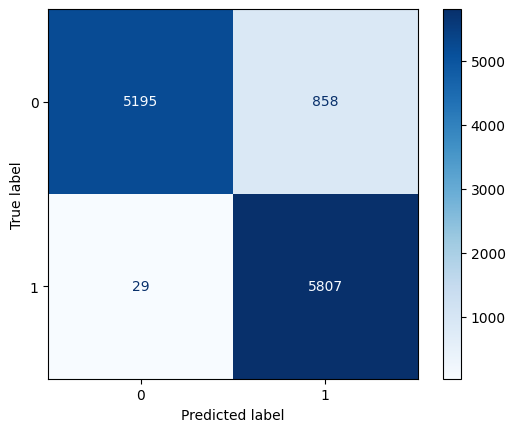

In [ ]:
# Evaluate and compare the models
print("Bernoulli Naive Bayes:")
print(classification_report(y_test, y_pred_bernoulli))
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)
disp_bernoulli = ConfusionMatrixDisplay(conf_matrix_bernoulli, display_labels=bernoulli_classifier.classes_)
disp_bernoulli.plot(cmap='Blues', values_format='d')
plt.show()

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      6053
           1       0.87      1.00      0.93      5836

    accuracy                           0.92     11889
   macro avg       0.93      0.93      0.92     11889
weighted avg       0.93      0.92      0.92     11889



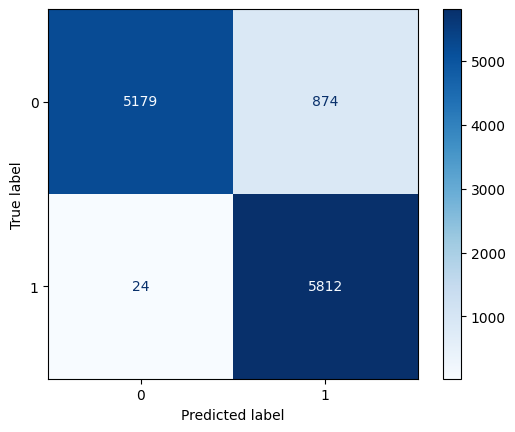

In [ ]:
print("Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multinomial))
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)
disp_multinomial = ConfusionMatrixDisplay(conf_matrix_multinomial, display_labels=multinomial_classifier.classes_)
disp_multinomial.plot(cmap='Blues', values_format='d')
plt.show()

Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      6053
           1       0.91      1.00      0.95      5836

    accuracy                           0.95     11889
   macro avg       0.95      0.95      0.95     11889
weighted avg       0.95      0.95      0.95     11889



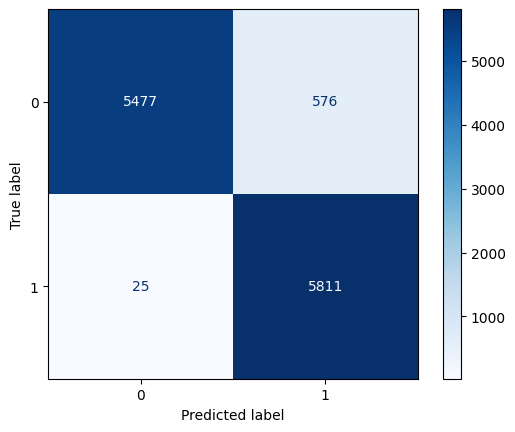

In [ ]:
print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gaussian))
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)
disp_gaussian = ConfusionMatrixDisplay(conf_matrix_gaussian, display_labels=gaussian_classifier.classes_)
disp_gaussian.plot(cmap='Blues', values_format='d')
plt.show()